In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# fred API call for interest rate

fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= "b89a8705b676607c683445a983e6d21f"

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

In [3]:
# Create interest rate dataframe
int_rate_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]

# Convert date to datetime
int_rate_df['date'] = int_rate_df['date'].apply(pd.to_datetime)

# Convert value to float
int_rate_df = int_rate_df.astype({"value": float})

# Change column headers
int_rate_df = int_rate_df.rename(columns={"date": "Date", "value": "Interest Rate"})

# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")

# Disply values
int_rate_df.head()

,Date,Interest Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [4]:
# API Call for Consumer Price Index (CPI)
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'CPIAUCSL'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [5]:
# CPI Data frame
cpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
cpi_df = cpi_df[["date", "value"]]

# Convert date to datetime
cpi_df['date'] = cpi_df['date'].apply(pd.to_datetime)

# Convert value to float
cpi_df = cpi_df.astype({"value": float})

# Calculate/create inflation rate column
cpi_df['Inflation Rate'] = cpi_df['value'].pct_change(12)

# Convert inflation rate to %
cpi_df["Inflation Rate"]*=100

# Rename columns
cpi_df = cpi_df.rename(columns={"date": "Date", "value": "CPI"})

# Write To CSV
cpi_df.to_csv("output_data/cpi_rate.csv")

cpi_df.head()

,Date,CPI,Inflation Rate
0,1947-01-01,21.48,NaN
1,1947-02-01,21.62,NaN
2,1947-03-01,22.00,NaN
3,1947-04-01,22.00,NaN
4,1947-05-01,21.95,NaN


In [6]:
# Merge Interest Rate and CPI
mer_int_cpi_df = pd.merge(int_rate_df, cpi_df, on= 'Date')

# Write to CSV
mer_int_cpi_df.to_csv("output_data/merged_int_unemp_gdp_df.csv")

#Display
mer_int_cpi_df.head()

,Date,Interest Rate,CPI,Inflation Rate
0,1954-07-01,0.80,26.86,0.261292
1,1954-08-01,1.22,26.85,0.000000
2,1954-09-01,1.07,26.81,-0.297508
3,1954-10-01,0.85,26.72,-0.853432
4,1954-11-01,0.83,26.78,-0.260708


In [7]:
# Summary Statistics
mer_int_cpi_df[["Interest Rate", "Inflation Rate"]].describe()

,Interest Rate,Inflation Rate
count,822.000000,822.000000
mean,4.595499,3.583110
std,3.618005,2.829087
min,0.050000,-1.958761
25%,1.752500,1.688479
50%,4.110000,2.877084
75%,6.285000,4.437768
max,19.100000,14.592275


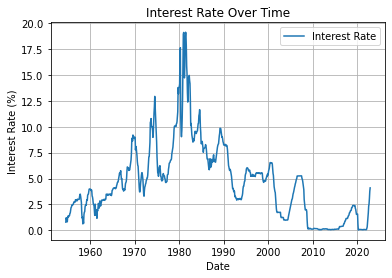

In [8]:
# Create interest rate over time line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Interest Rate"]

# Add titles
plt.title("Interest Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")

# Add gridlines for effect
plt.grid()

# Plot?
plt.plot(x_axis, y_axis)

# Add legend
plt.legend(["Interest Rate"])

# Export to figure
plt.savefig("output_data/interest_over_time.png")

# Display plot
plt.show()

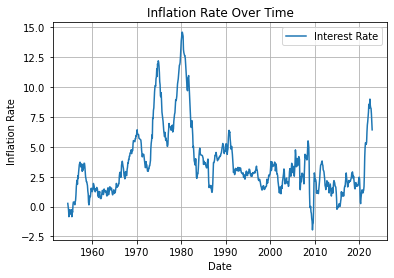

In [9]:
# Create interest rate over time line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Inflation Rate"]

# Add titles
plt.title("Inflation Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Inflation Rate")

# Add gridlines for effect
plt.grid()

# Plot?
plt.plot(x_axis, y_axis)

# Change line color
plt.plot(color = "orange")

# Add legend
plt.legend(["Interest Rate"])

# Save the figure
plt.savefig("output_data/inflation_over_time.png")

plt.show()

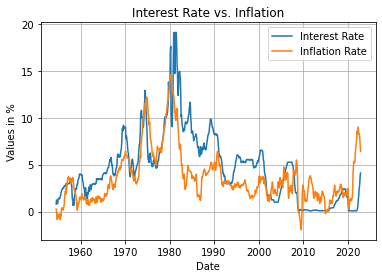

In [10]:
# Create Interest rate vs inflation rate line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Interest Rate"]
y2_axis = mer_int_cpi_df["Inflation Rate"]

# Add titles
plt.title("Interest Rate vs. Inflation")
plt.xlabel("Date")
plt.ylabel("Values in %")

# Add gridlines for effect
plt.grid()

# Plot
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y2_axis)
plt.legend(["Interest Rate", "Inflation Rate"])

# Save the figure
plt.savefig("output_data/interest_vs_inflation_line.png")

plt.show()

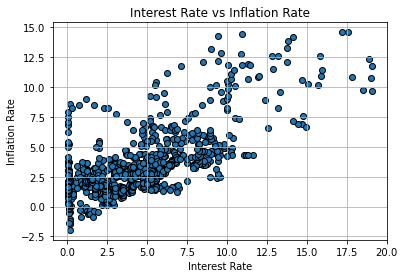

In [11]:
# Build the scatter plots interest rate vs inflation rate
y_values = mer_int_cpi_df["Inflation Rate"]
x_values = mer_int_cpi_df["Interest Rate"]

# Do some formating for effect
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")

# Add titles
plt.title('Interest Rate vs Inflation Rate')
plt.ylabel("Inflation Rate")
plt.xlabel("Interest Rate")

# Add gridlines for effect
plt.grid()

# Save the figure
plt.savefig("output_data/interest_vs_inflation_scatter.png")

# Show plot
plt.show()

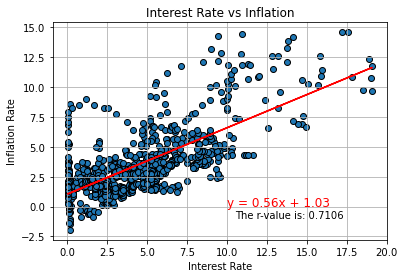

In [15]:
# Interest rate vs inflation linear regression

# Set variable
interest_rate = mer_int_cpi_df['Interest Rate']
inflation_rate = mer_int_cpi_df['Inflation Rate']

# Build the plot
x_values = interest_rate
y_values = inflation_rate

#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formating for effect
plt.scatter(x_values,y_values,linewidth=1, marker="o", edgecolors="black")

# Plot Regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=12,color="red")

# Add some titles
plt.title(label="Interest Rate vs Inflation")
plt.xlabel('Interest Rate')
plt.ylabel('Inflation Rate')

# Text to show r-value
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,-1,text)


# Add gridlines for effect
plt.grid()

# save the figure as an .svg 
plt.savefig("output_data/interest_vs_inflation_regression.png")

# Show plot
plt.show()